<a href="https://colab.research.google.com/github/Izuho/computer-graphics/blob/main/9-16/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import os

import distutils
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('学習用写真 : ', x_train.shape, '\n学習用ラベル : ', y_train.shape, '\nテスト用写真 : ', x_test.shape, '\nテスト用ラベル : ', y_test.shape)

学習用写真 :  (60000, 28, 28) 
学習用ラベル :  (60000,) 
テスト用写真 :  (10000, 28, 28) 
テスト用ラベル :  (10000,)


# TensorFlowの使い方
1.   レイヤーを指定する。使用可能なレイヤーは以下の通り。

> https://www.tensorflow.org/api_docs/python/tf/keras/layers?hl=ja



In [ ]:
# 単純な単一層のモデル
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2.   モデルをコンパイルする。オプティマイザー、損失関数、学習時に表示する指標を指定する。


> https://www.tensorflow.org/api_docs/python/tf/keras/Sequential



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

3. Cross validationによってモデルの性能を評価する。テスト用データは使ってはいけない！

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5315 - accuracy: 0.8148 - val_loss: 0.4189 - val_accuracy: 0.8503
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3974 - accuracy: 0.8586 - val_loss: 0.3977 - val_accuracy: 0.8540
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3546 - accuracy: 0.8716 - val_loss: 0.3506 - val_accuracy: 0.8739
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3241 - accuracy: 0.8816 - val_loss: 0.3680 - val_accuracy: 0.8633
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3087 - accuracy: 0.8868 - val_loss: 0.3333 - val_accuracy: 0.8793
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2928 - accuracy: 0.8931 - val_loss: 0.3281 - val_accuracy: 0.8839
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2795 - accuracy: 0.8957 - val_loss: 0.3189 - val_accuracy:

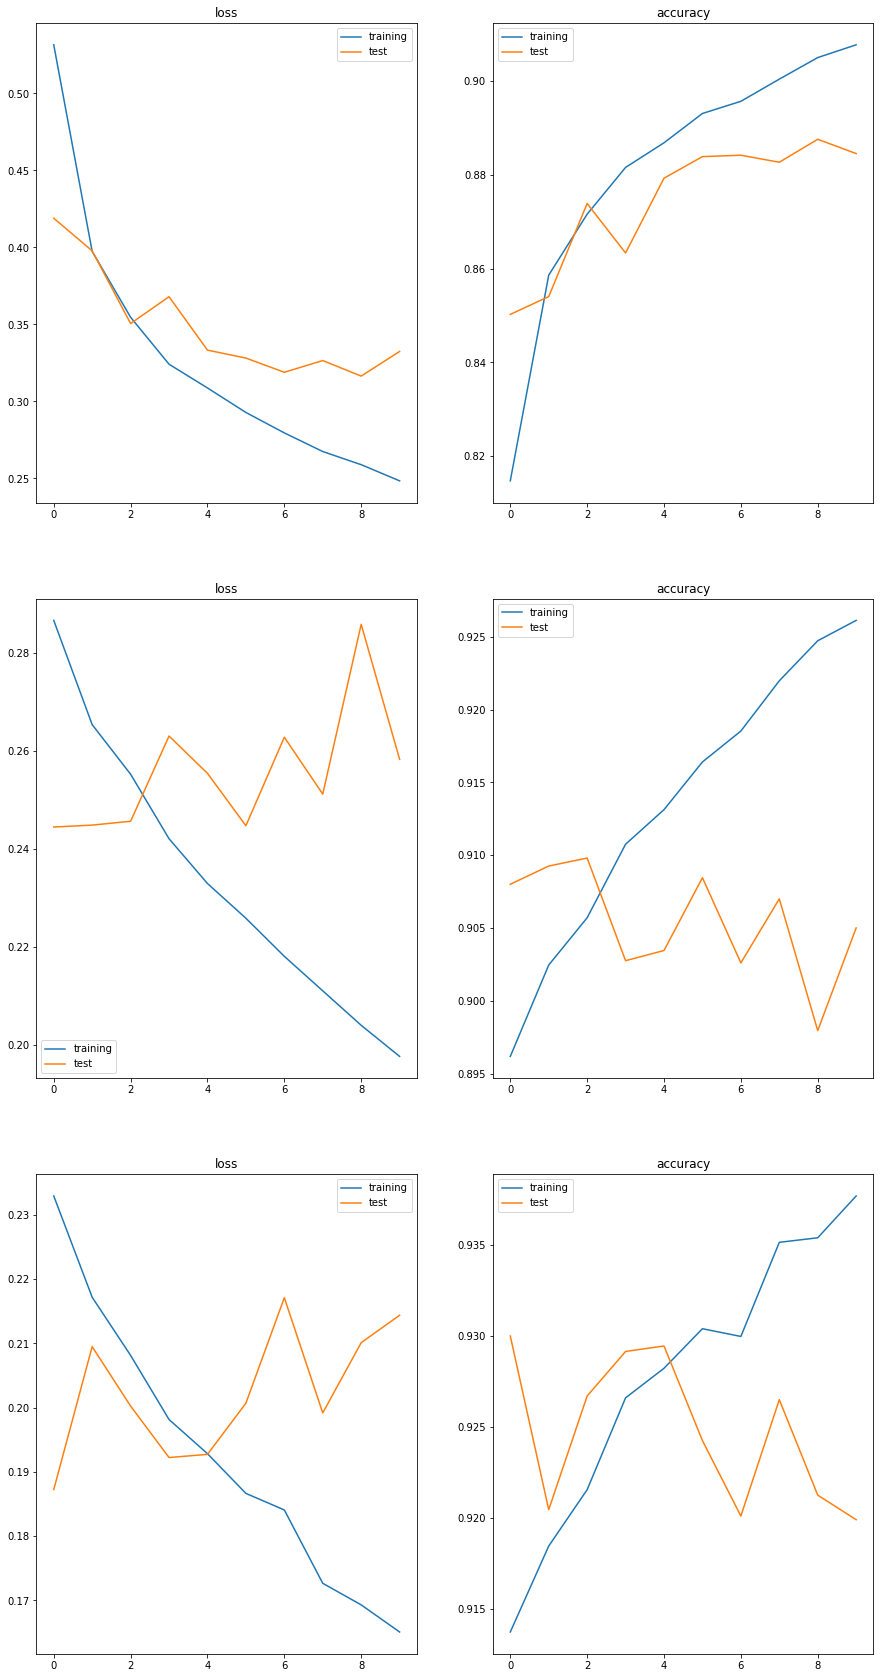

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#KFoldのインポート
from sklearn.model_selection import KFold
 

K = 3
#KFoldの設定
kf = KFold(n_splits = K, shuffle = True, random_state = 1)
j = 0
plt.figure(figsize=(15, 30))  # グラフを表示するスペースを用意
 
#交差検証
for train, test in kf.split(x_train):
    
    history = model.fit(x_train[train],
                        y_train[train],
                        validation_data = (x_train[test], y_train[test]), 
                        epochs = 10)

    metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

    for i in range(len(metrics)):
        j += 1

        metric = metrics[i]

        plt.subplot(3, 2, j)
        plt.title(metric)  # グラフのタイトルを表示
    
        plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
        plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す
    
        plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
        plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
        plt.legend()  # ラベルの表示
    
plt.show()  # グラフの表示
